# High Dimensional Vectors / Vectorizing Data
### Chris Tralie

It is very straightforward to generalize the vector rules we've seen so far to higher dimensions.  Let's start in 3D.  In this case, the vector has 3 components: one along the x-axis, one along the y-axis, and one along the z-axis.  We can think of each component as being the side of a cube, as drawn below:

<img src = "3DVector1.svg">


Actually, we can see right away that the magnitude rule generalizes what we saw in 2D.  Let's consider the length of the projection of this vector onto the XZ plane, which I'll call <b>u</b>.  This vector makes a right angle with the vector from the tip of <b>u</b> to <b>(a, b, c)</b>, which I'll call <b>v</b>.  The picture below shows this

<img src = "3DVector2.svg">




<b>u</b> can really be thought of as just a 2D vector in the XZ plane, and we already know how to compute its magnitude

### $|\vec{u}| = \sqrt{a^2 + c^2}$

<b>v</b> is even simpler because it's just a straight line along the y-axis, so its magnitude is the length <b>b</b>.  Since <b>u</b> is perpendicular to <b>v</b>, we can apply the pythagorean theorem again to get the length of <b>(a, b, c)</b>

### $|(a, b, c)| = |\vec{u}|^2 + |\vec{v}|^2 = \sqrt{(\sqrt{a^2 + c^2})^2 + b^2} = \sqrt{a^2 + b^2 + c^2}$ 

In fact, this can generalize to any Euclidean dimension if we keep applying the Pythagorean theorem inductively.  So, for example, in 4D, the magnitude of the vector

### $\vec{v} = (a, b, c, d)$

is 

### $|\vec{v}| = \sqrt{a^2+b^2+c^2+d^2}$

and the magnitude of a $d$-dimension vector <b>v</b> is

### $|\vec{v}| = \sqrt{ \sum_{i = 1}^d v_i^2 }$

Vector addition and subtraction are exactly the same as well.  For instance, 

### $(a, b, c, d) - (e, f, g, h) = (a-e, b-f, c-g, d-h)$

Even though we can't visualize such vectors directly, we can still compute these things about them


## Features: Vectorizing Data
A lot of data that we deal with either comes with many dimensions, or we can summarize it with our own choice of dimensions, each of which is referred to as a <b>feature</b>.  Let's return to the <a href = "https://ursinus-cs477-f2021.github.io/CoursePage/ClassExercises/Week6_GradSchoolAdmissions/">grad school admissions data</a> that we applied Naive Bayes to in class.  This time, we'll think of it in more geometric terms.  We have 6 features: 

["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]

So we can think of each student as a vector in 6 dimensional space.  When we have many such vectors, its a convention in AI/ML to order them in a 2D matrix where each row is a unique data entry and the columns correspond to different dimensions.  I will usually refer to this matrix as a capital <b>X</b> in this class.  For example, here's how we would organize a set of <b>n</b> points in 4D

<img src = "DataMatrix4D.svg">

In general, <b>n</b> points in <b>d</b> dimensions would be in a $n \times d$ matrix.

Let's plot the first 3 dimensions/columns of the grad school data below.  We'll just plot the tip of each vector as a point, which we will color by the chance of being admitted.  The brighter the point, the more likely it is that the student will be admitted

Text(0.5, 0, 'University Rating')

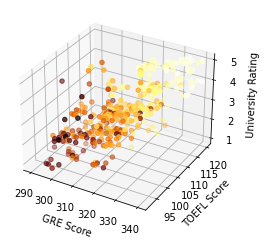

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

res = pd.read_csv("Admission_Predict.csv")
columns = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]
X = res[columns].to_numpy() # Load in data matrix
y = res["Chance of Admit "].to_numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='afmhot')
ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])
ax.set_zlabel(columns[2])

Actually, it will be good to <b>normalize</b> the dimensions first; that is, the dimensions each have a different range (e.g. CGPA is in the range 1-10, while GRE score is in the range from 290-340.  To make sure that no dimension has an outsized influence, we'll put each dimension into the range <b>[0, 1]</b> by subtracting off the min of each dimension and dividing by the max that remains

In [2]:
X = X - np.min(X, axis=0) # Subtract off the min of each column from that entire column
X = X/np.max(X, axis=0) # Divide each element of a column by the max of that column

Now, if we think about the magnitude of our vectors, it should grow larger as the student has a higher chance of being admitted.  In other words, each dimension contributes positively towards chance of being admitted.  Let's compute the magnitude of each dimension and see if there is such a correlation

Text(0, 0.5, 'Chance of getting in')

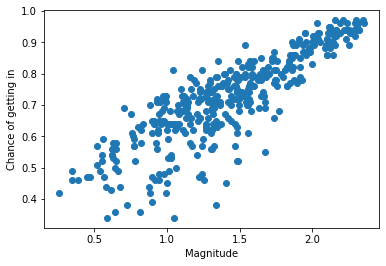

In [3]:
mags = []
for i in range(X.shape[0]): # Loop through rows
    sqr_sum = 0
    for d in range(X.shape[1]): # Loop through the columns
        sqr_sum += X[i, d]**2
    mags.append(np.sqrt(sqr_sum))

plt.figure()
plt.scatter(mags, y)
plt.xlabel("Magnitude")
plt.ylabel("Chance of getting in")

We indeed see that the chance of getting in goes up with magnitude!  There is a shorter way to do this with "numpy broadcasting" code, though.  We can square all of the elements of <b>X</b>, then sum them individually across each row, and finally take the square root of what's left

Text(0, 0.5, 'Change of getting in')

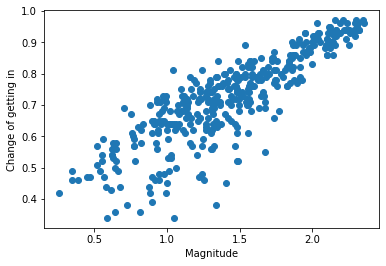

In [4]:
XSqr = X**2
XSqrRowSum = np.sum(XSqr, axis=1)
mags = np.sqrt(XSqrRowSum)
# Or, all in one line:
mags = np.sqrt(np.sum(X**2, axis=1))
plt.figure()
plt.scatter(mags, y)
plt.xlabel("Magnitude")
plt.ylabel("Change of getting in")